/tmp/ipykernel_1597/3131700025.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


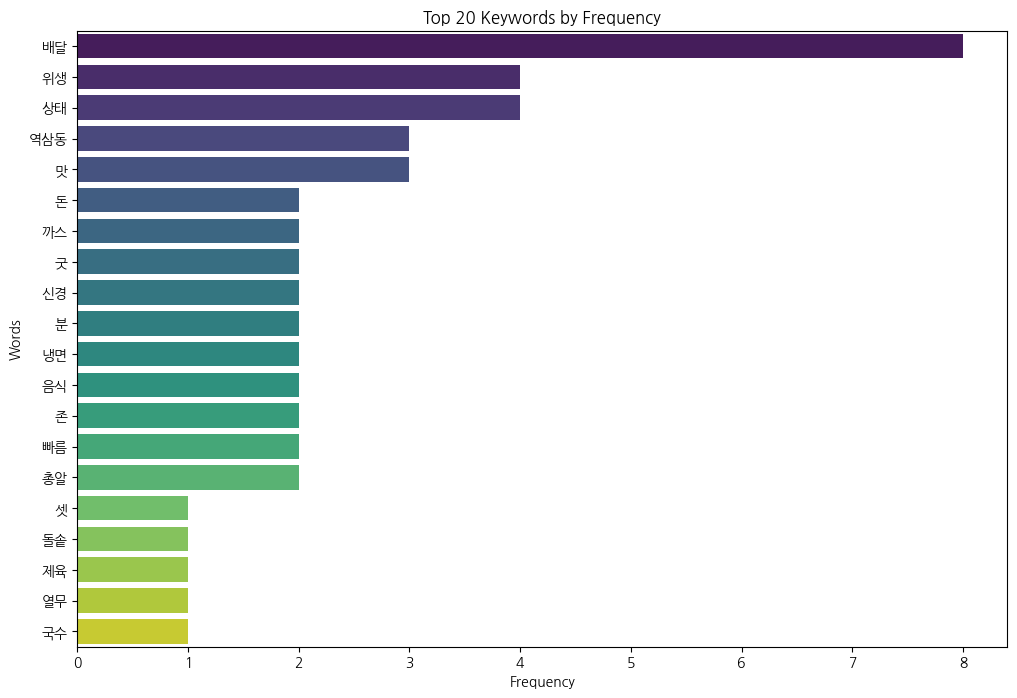

/tmp/ipykernel_1597/3131700025.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()), palette='viridis')


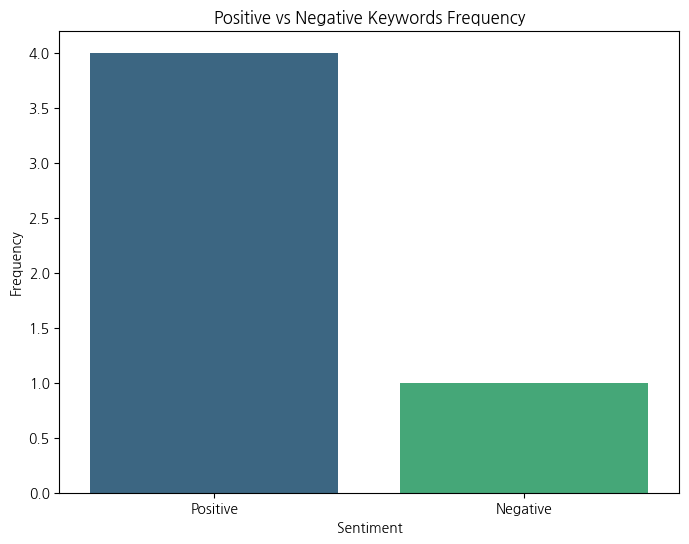

LDA 기반 주요 토픽:
토픽 1: ['애용', '정도 애용', '계란찜 반찬', '반찬', '배송', '배송 정도', '애용 계란찜', '정도', '계란찜', '배달']
토픽 2: ['배달', '역삼동 맛집', '맛집', '맛집 총알', '한식 배달', '하이 한식', '하이', '한식', '역삼', '역삼 하이']
토픽 3: ['위생 상태', '위생', '상태', '배달', '상태 신경', '신경', '냉면', '배달 냉면', '물론', '배달 물론']
토픽 4: ['역삼동', '배달', '분식집', '별루 분식집', '별루', '역삼동 총알', '총알 배달', '총알', '식인', '역삼동 배달']
토픽 5: ['상태 최악', '최악', '열무 국수', '국수', '제육', '제육 까스', '까스 열무', '국수 닭도리탕', '열무', '돌솥 제육']


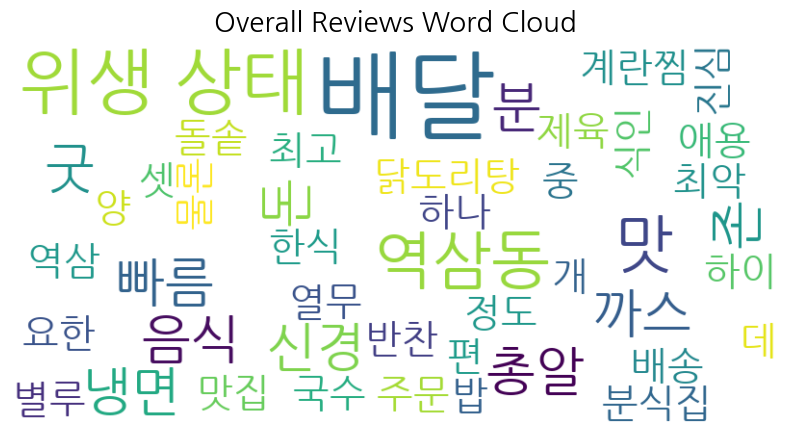

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import datetime
from matplotlib import font_manager, rc
from konlpy.tag import Mecab

# 한글 폰트 설정 (예: 나눔고딕)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 폰트 파일 경로를 맞게 설정해 주세요
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 그래프에서 마이너스 폰트 깨짐 문제 해결
plt.rcParams['axes.unicode_minus'] = False

# Load the data
data = pd.read_csv('./data/24시 하이들_reviews_추천순.csv')

# 'Date' 열을 'Review_Date'로 변경하고 datetime 형식으로 변환
data['Review_Date'] = pd.to_datetime(data['Date'], format='%Y년 %m월 %d일 %A', errors='coerce')

# Preprocessing steps (special character removal, stopword removal)
def clean_special_characters(text):
    return re.sub(r"[^가-힣a-zA-Z0-9\s]", "", text.replace('\n', ' '))

def remove_stopwords(text, stopwords):
    return ' '.join([word.strip() for word in text.split() if word.strip() not in stopwords])

stopwords = [
    "을", "를", "이", "가", "은", "는", "에", "의", "으로", "와", "과", "고", "도", "부터", "까지", 
    "에서", "한테", "에게", "도", "만", "마저", "조차", "처럼", "듯이", "하고", "하여", "했으며", 
    "하다", "였다", "되다", "있다", "그리고", "그러나", "하지만", "그러므로", "따라서", "그런데", 
    "또한", "또", "그러면", "아니면", "아주", "매우", "정말", "너무", "아마", "약간", "조금", 
    "대체로", "대부분", "다소", "한", "이미", "현재", "원래", "싶다", "같다", "보다", "이런", 
    "저런", "그런", "어떤", "모든", "각", "이", "그", "저", "와", "우와", "오", "아", "어", 
    "오오", "아아", "오늘", "어제", "내일", "요즘", "최근", "항상", "자주", "가끔", "언제", 
    "종종", "매일", "이번", "다음", "이전", "것", "수", "분", "때문", "같이", "위해", "중", 
    "후", "전", "등등", "그것", "이것", "저것", "여기", "저기", "거기", "그곳", "이곳", "저쪽",
    "곧", "잠시", "금방", "바로", "지금", "당장", "방금", "아직", "언젠가", "절대", "전혀", 
    "어쩌면", "결국", "종종", "이다", "아니다", "있다", "없다", "위해", "때", "경우", "듯", 
    "게", "걸", "며", "니", "듯", "탓", "만큼", "따름", "습니다", "니다", "이고", "해요", "가요",
    "한동안", "오랜만", "그래서", "어제"
]

data['Cleaned_Review'] = data['Review'].apply(clean_special_characters)
data['No_Stopwords_Review'] = data['Cleaned_Review'].apply(lambda x: remove_stopwords(x, stopwords))

# Mecab 객체 생성
mecab = Mecab()

# 형태소 분석 후 명사만 추출하는 함수 정의
def extract_nouns(text):
    return ' '.join(mecab.nouns(text))

# 명사만 추출하여 리뷰 데이터 업데이트
data['Nouns_Only_Review'] = data['No_Stopwords_Review'].apply(extract_nouns)

# 1. 빈도 기반 중요도 분석 - 상위 키워드 시각화
def plot_top_keywords(text_data, title, top_n=20):
    words = ' '.join(text_data).split()
    word_freq = Counter(words)
    common_words = word_freq.most_common(top_n)
    words, counts = zip(*common_words)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(title)
    plt.show()

plot_top_keywords(data['Nouns_Only_Review'], 'Top 20 Keywords by Frequency')

# 2. 긍정 단어와 부정 단어 빈도 분석
positive_words = [
    "좋", "훌륭", "최고", "맛있", "추천", "즐겁", "기쁘", "만족", "감동", "깨끗", "재밌", "친절",
    "감사", "좋아하", "편안", "행복", "깔끔", "존맛", "JMT", "맛집", "짱", "베스트", "대박",
    "최애", "힐링", "감탄", "인생", "역대급", "완벽", "신선", "든든", "엄지 척", "배려", "뿌듯",
    "포근", "추천템", "안심", "만족도 최고", "편리", "세련", "유용", "아늑", "기대 이상", "고급지다",
    "센스있", "특별", "화려", "러블리", "맛보장", "행운", "예쁘다", "베리 굿", "가성비 좋", "적극 추천",
    "감성적", "취향저격", "레전드", "완소", "쏘 스윗", "찐행복", "갓성비", "귀엽", "최애템", "핵꿀잼",
    "고급미", "갓벽", "미쳤다", "오져", "대만족", "찐사랑", "신박", "고퀄", "강추", "존좋", "너무 좋",
    "죽인다", "굿굿", "금손", "소확행", "최상급", "훈훈", "신세계", "고급짐", "재구매 의사", "초강추",
    "귀엽고 예쁨", "찐템", "꿀템", "신박하다", "행복함", "안심됨", "극호", "꾸안꾸", "손맛 좋",
    "핵감동", "친근감", "든든함", "사랑스러움", "행복사", "찐최애", "만점템", "찐인생템", "눈호강",
    "청정구역", "맑고 깨끗", "깨알재미", "귀염", "사랑스럽다", "가성비템", "깔쌈", "베리굿", "딱 좋음",
    "잘 나감", "편의성 굿", "안정적", "배부름", "센스 만점", "짱짱맨", "적극적", "말해 뭐해", "넘사벽",
    "신뢰감", "꿀잼보장", "심쿵", "센스 넘침", "재미짐", "편리함", "만족스러움", "무한 감동", "탄탄함",
    "우수함", "굿", "존맛탱구리", "ㄴㅇㅅ", "내돈내산", "또방문", "재방문 의사 있", "유명", "소문낼",
    "유명한 이유가 있", "돈 값을 하는", "충족", "ㄱㅇㄷ", "개이득", "최상", "킹왕짱", "행복함",
    "맛집 인정", "찐맛", "호불호 없음", "득템각", "부담없", "소장각", "갓템", "마음에 쏙", "신뢰성",
    "마음에 든다", "완소템", "힐링템", "푹신함", "대존맛", "신의 한 수", "필수템", "사길 잘함", "극찬",
    "알차다", "취향존중", "무조건 추천", "고급", "실속 있음", "잘 맞음", "너무 예쁘다",
    "만족함", "매력있음", "비교불가", "퀄리티 갑", "최상의 선택", "역시 좋다", "손이 가요",
    "가치 있음", "핫플", "핵추천", "혜자템", "품질보장", "끝내줌", "강력 추천", "금방 동남",
    "엄지척", "거의 완벽", "찬사받음", "너무 예쁨", "감동적", "눈이 즐거움", "존맛", "핫템",
    "정말 좋아요", "불만 없음", "깔끔한 마무리", "퀄리티 짱", "세상 최고", "매력적", "끝내줌", "눈물남",
    "현존 최고", "좋은 선택", "짱짱", "상상초월", "미친 가성비", "저렴한데 좋음", "찐", "돈 값함",
    "인정", "핵만족", "보장된 품질", "칭찬할 만함", "행운템", "아기자기함", "다시 가고 싶음",
    "핵감사", "짱짱짱", "여긴 진짜다"
]
negative_words = [
    "나쁘", "별로", "싫", "최악", "불편", "문제", "실망", "불만", "안좋", "안되", "부족", "힘들",
    "비싸", "짜증", "불친절", "후회", "아쉽", "형편없", "엉망", "답답", "지루", "불쾌", "피곤",
    "귀찮", "못하", "어렵", "복잡", "짜증나", "실수", "기대 이하", "아깝", "화나", "무례", "미흡",
    "고통", "시끄럽", "안타깝", "낡", "지저분", "아프", "헛걸음", "속상", "똥손", "후지", "망",
    "버거움", "별로임", "바가지", "낙후", "불량", "헛돈", "극혐", "잦은 오류", "대충", "불쾌한 경험",
    "비추", "별로네", "허접", "노답", "구려", "폐급", "구리다", "짜증 폭발", "돈낭비", "헬", "멘붕",
    "분노", "허접하다", "불편함", "답답함", "현타", "먹튀", "짜증남", "신경쓰임", "헛돈", "개노답",
    "한심", "쌩돈", "쓰레기", "이딴", "어설프다", "오류 많음", "형편없음", "허무함", "낭비", "아쉬움",
    "개판", "헬게이트", "어이없음", "대실망", "구림", "후회막급", "서비스 엉망", "좌절", "불편하다",
    "무리수", "취소각", "짜증만땅", "불만족", "더럽다", "화가남", "찝찝", "바가지", "속터짐", "별로다",
    "실망스러움", "별로에요", "스트레스", "무책임", "노잼", "먹금", "못난", "오바임", "과대광고",
    "구라", "실망임", "불만족스럽", "개노답", "망했", "못하겠", "허접쓰", "오지랖", "지저분함",
    "헛소리", "오류투성이", "피곤함", "서비스 엉망진창", "예민함", "낙제점", "답없다", "과함", "잔소리",
    "번거로움", "불완전", "뻘짓", "정떨어짐", "영혼 없음", "허술함", "제자리", "정리안됨", "답이 없음",
    "빈약함", "불친절한 응대", "뻔뻔", "낙후됨", "어이상실", "시간낭비", "멀미", "부실함", "막장임",
    "헛고생", "최악의 경험", "실망감", "엉망진창", "걱정됨", "재방문 의사 없", "개노맛", "실망각",
    "차라리 안 샀음", "먹다 버림", "재구매 없음", "헛돈 날림", "버림", "답답함", "후회함", "개망",
    "터무니없", "형편 없음", "망템", "퀄리티 떨어짐", "돈 아까움", "상태 불량", "비효율적", "쓸모없음",
    "버림", "품질 저하", "오바스러움", "가성비 별로", "마음에 안 듦", "손해", "완전 별로", "무의미",
    "효율성 없음", "가치 없음", "엉성함", "재방문 안함", "비추함", "믿고 걸러", "두 번 다시", "안 맞음",
    "어이없다", "구매 비추천", "완전 구림", "불량품", "기대와 다름", "불쾌감", "미스", "절대 비추",
    "낭비된 돈", "비추요", "이 돈값 못함", "바로 반품", "싼 게 비지떡", "텅텅", "돈값 못함", "손해봤다",
    "별로였음", "너무 별로", "비추템", "핵노잼", "돈 아까움", "실망", "안간다", "차라리 딴데", "속았음",
    "후회만 남음", "맘 상함", "믿거템", "한 번 가고 안 감", "사기템", "버림", "쓰레기템", "더러움",
    "터무니 없음", "낚임", "두 번은 안 감", "쓰레기 서비스", "불안함", "서비스 미숙", "당황스러움",
    "너무 느림", "후회만 가득", "갈 이유 없음", "마음 상함", "말도 안 됨", "너무 허접", "없어서 못감",
    "체감상 별로", "기분 상함", "하자 많음", "최악의 결정", "구매 후회", "안습", "저렴한 티", "헛된 시간",
    "망함", "지저분", "두 번 안 감", "손해봄", "싼 맛에 샀는데 후회", "기대보다 별로", "차라리 안 사는 게",
    "기분 상함", "아무것도 아님", "안 사는 게 나음", "갓성비 아님", "여기만 빼고 다 좋음", "진절머리",
    "진저리", "별로다 못해 최악", "위생이 별로"
]

def plot_sentiment_keywords(text_data, positive_words, negative_words, title):
    words = ' '.join(text_data).split()
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    sentiment_counts = {
        'Positive': positive_count,
        'Negative': negative_count
    }

    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()), palette='viridis')
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

plot_sentiment_keywords(data['Nouns_Only_Review'], positive_words, negative_words, 'Positive vs Negative Keywords Frequency')

# 3. TF-IDF 기반 주요 키워드 추출
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Nouns_Only_Review'])

# 상위 키워드 추출
def extract_top_keywords(tfidf_matrix, tfidf_vectorizer, top_n=10):
    keywords = []
    for i in range(tfidf_matrix.shape[0]):
        row_data = tfidf_matrix[i].toarray().flatten()
        top_indices = row_data.argsort()[-top_n:][::-1]
        top_keywords = [tfidf_vectorizer.get_feature_names_out()[idx] for idx in top_indices]
        keywords.append(top_keywords)
    return keywords

data['Top_Keywords'] = extract_top_keywords(tfidf_matrix, tfidf_vectorizer)

# 4. 주제 모델링 (LDA) 기반 주요 주제 분류
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda_model.fit_transform(tfidf_matrix)

def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(top_words)
    return topics

no_top_words = 10
topics = display_topics(lda_model, tfidf_vectorizer.get_feature_names_out(), no_top_words)
print("LDA 기반 주요 토픽:")
for i, topic in enumerate(topics):
    print(f"토픽 {i + 1}: {topic}")

# 5. 긍정/부정 리뷰의 비교 - 별도의 워드 클라우드 생성
def create_wordcloud(text, title):
    if not text.strip():
        print(f"No words available for {title}. Skipping word cloud generation.")
        return
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# positive_reviews = ' '.join(data[data['Nouns_Only_Review'].str.contains('|'.join(positive_words))]['Nouns_Only_Review'])
# negative_reviews = ' '.join(data[data['Nouns_Only_Review'].str.contains('|'.join(negative_words))]['Nouns_Only_Review'])

# create_wordcloud(positive_reviews, 'Positive Reviews Word Cloud')
# create_wordcloud(negative_reviews, 'Negative Reviews Word Cloud')
create_wordcloud(' '.join(data['Nouns_Only_Review']), 'Overall Reviews Word Cloud')

# 6. 시계열 분석 - 리뷰 감성 변화 분석
data = data.dropna(subset=['Review_Date'])
data = data.sort_values('Review_Date')

# 감성 점수 부여 (긍정: 1, 부정: -1)
data['Sentiment_Score'] = data['Nouns_Only_Review'].apply(lambda x: 1 if any(word in positive_words for word in x.split()) else (-1 if any(word in negative_words for word in x.split()) else 0))

# # 시계열 데이터 그룹화 (월별 평균 감성 점수 계산)
# time_series_data = data.set_index('Review_Date').resample('M')['Sentiment_Score'].mean()



# 형태소 모든 거 포함

/tmp/ipykernel_1597/4013472220.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


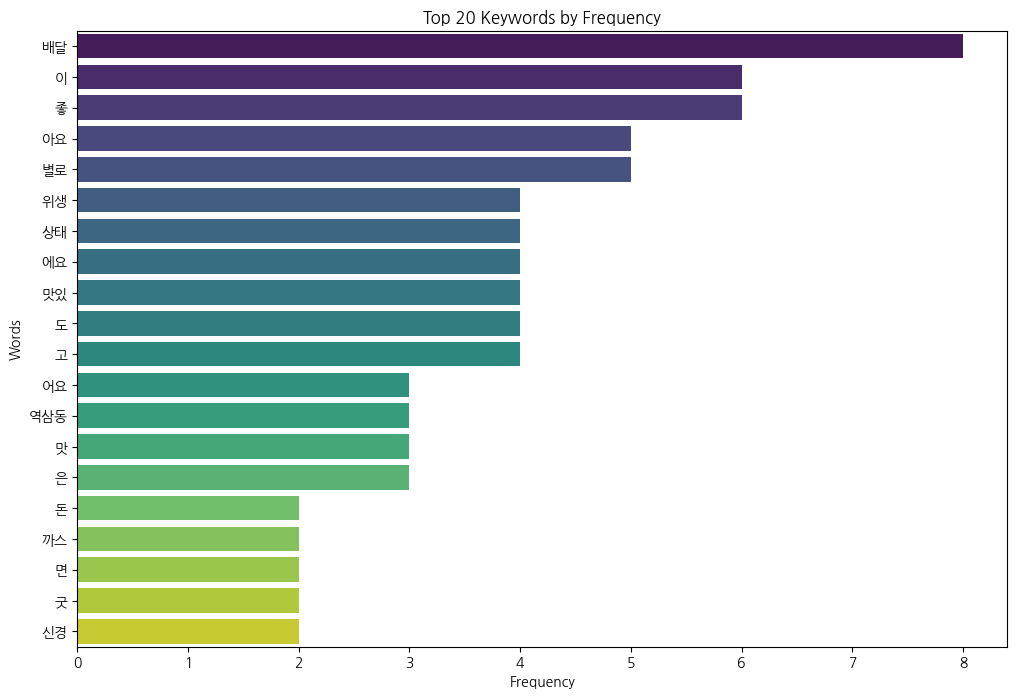

/tmp/ipykernel_1597/4013472220.py:153: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()), palette='viridis')


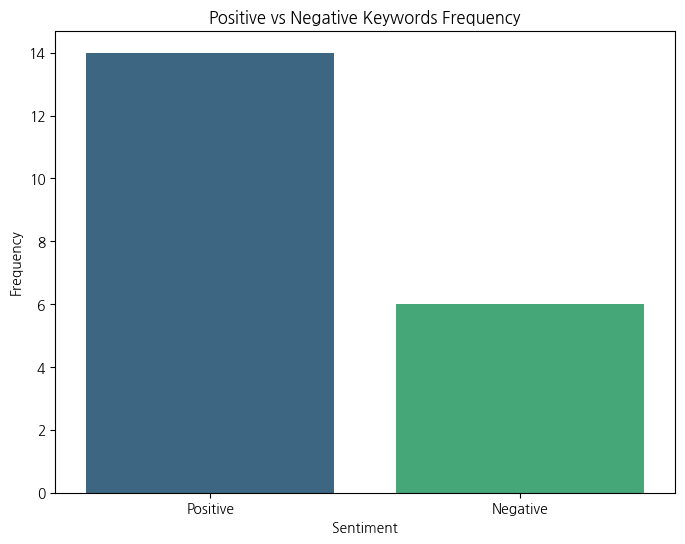

LDA 기반 주요 토픽:
토픽 1: ['그럭저럭', '맛있', '배달', '맛있 어요', '어요', '역삼동', '음식', '빠름', '역삼동 맛집', '맛집 총알']
토픽 2: ['예요', '별루 예요', '인데 비싼', '메인', '메인 별루', '많이 메인', '예요 분식집', '별루', '많이', '진짜 많이']
토픽 3: ['배달', '총알', '총알 배달', '그럭저럭', '맛있', '역삼동', '아요', '최악', '입니다', '상태 최악']
토픽 4: ['위생', '상태', '위생 상태', '맛나', '상태 신경', '신경', '신경 세요', '세요', '빠른데', '아서']
토픽 5: ['아요', '별로', '별로 에요', '에요', '배달', '역삼동 총알', '총알 배달', '총알', '역삼동', '빠르 냉면']


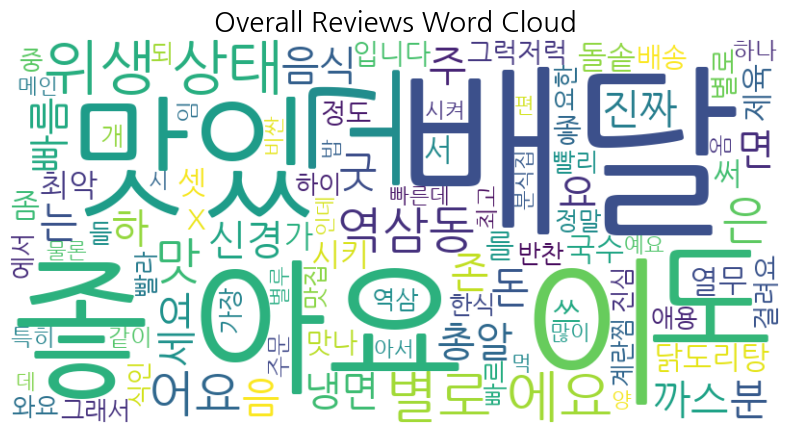

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import datetime
from matplotlib import font_manager, rc
from konlpy.tag import Mecab

# 한글 폰트 설정 (예: 나눔고딕)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 폰트 파일 경로를 맞게 설정해 주세요
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 그래프에서 마이너스 폰트 깨짐 문제 해결
plt.rcParams['axes.unicode_minus'] = False

# Load the data
data = pd.read_csv('./data/24시 하이들_reviews_추천순.csv')

# 'Date' 열을 'Review_Date'로 변경하고 datetime 형식으로 변환
data['Review_Date'] = pd.to_datetime(data['Date'], format='%Y년 %m월 %d일 %A', errors='coerce')

# Preprocessing steps (special character removal, stopword removal)
def clean_special_characters(text):
    return re.sub(r"[^가-힣a-zA-Z0-9\s]", "", text.replace('\n', ' '))

def remove_stopwords(text, stopwords):
    return ' '.join([word.strip() for word in text.split() if word.strip() not in stopwords])

stopwords = [
    "을", "를", "이", "가", "은", "는", "에", "의", "으로", "와", "과", "고", "도", "부터", "까지", 
    "에서", "한테", "에게", "도", "만", "마저", "조차", "처럼", "듯이", "하고", "하여", "했으며", 
    "하다", "였다", "되다", "있다", "그리고", "그러나", "하지만", "그러므로", "따라서", "그런데", 
    "또한", "또", "그러면", "아니면", "아주", "매우", "정말", "너무", "아마", "약간", "조금", 
    "대체로", "대부분", "다소", "한", "이미", "현재", "원래", "싶다", "같다", "보다", "이런", 
    "저런", "그런", "어떤", "모든", "각", "이", "그", "저", "와", "우와", "오", "아", "어", 
    "오오", "아아", "오늘", "어제", "내일", "요즘", "최근", "항상", "자주", "가끔", "언제", 
    "종종", "매일", "이번", "다음", "이전", "것", "수", "분", "때문", "같이", "위해", "중", 
    "후", "전", "등등", "그것", "이것", "저것", "여기", "저기", "거기", "그곳", "이곳", "저쪽",
    "곧", "잠시", "금방", "바로", "지금", "당장", "방금", "아직", "언젠가", "절대", "전혀", 
    "어쩌면", "결국", "종종", "이다", "아니다", "있다", "없다", "위해", "때", "경우", "듯", 
    "게", "걸", "며", "니", "듯", "탓", "만큼", "따름", "습니다", "니다", "이고", "해요", "가요",
    "한동안", "오랜만", "그래서", "어제"
]

data['Cleaned_Review'] = data['Review'].apply(clean_special_characters)
data['No_Stopwords_Review'] = data['Cleaned_Review'].apply(lambda x: remove_stopwords(x, stopwords))

# Mecab 객체 생성
mecab = Mecab()

# 모든 품사 추출하는 함수 정의
def extract_all_morphs(text):
    return ' '.join(mecab.morphs(text))

# 모든 형태소를 추출하여 리뷰 데이터 업데이트
data['All_Morphs_Review'] = data['No_Stopwords_Review'].apply(extract_all_morphs)


# 1. 빈도 기반 중요도 분석 - 상위 키워드 시각화
def plot_top_keywords(text_data, title, top_n=20):
    words = ' '.join(text_data).split()
    word_freq = Counter(words)
    common_words = word_freq.most_common(top_n)
    words, counts = zip(*common_words)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(title)
    plt.show()

plot_top_keywords(data['All_Morphs_Review'], 'Top 20 Keywords by Frequency')

# 2. 긍정 단어와 부정 단어 빈도 분석
positive_words = [
    "좋", "훌륭", "최고", "맛있", "추천", "즐겁", "기쁘", "만족", "감동", "깨끗", "재밌", "친절",
    "감사", "좋아하", "편안", "행복", "깔끔", "존맛", "JMT", "맛집", "짱", "베스트", "대박",
    "최애", "힐링", "감탄", "인생", "역대급", "완벽", "신선", "든든", "엄지 척", "배려", "뿌듯",
    "포근", "추천템", "안심", "만족도 최고", "편리", "세련", "유용", "아늑", "기대 이상", "고급지다",
    "센스있", "특별", "화려", "러블리", "맛보장", "행운", "예쁘다", "베리 굿", "가성비 좋", "적극 추천",
    "감성적", "취향저격", "레전드", "완소", "쏘 스윗", "찐행복", "갓성비", "귀엽", "최애템", "핵꿀잼",
    "고급미", "갓벽", "미쳤다", "오져", "대만족", "찐사랑", "신박", "고퀄", "강추", "존좋", "너무 좋",
    "죽인다", "굿굿", "금손", "소확행", "최상급", "훈훈", "신세계", "고급짐", "재구매 의사", "초강추",
    "귀엽고 예쁨", "찐템", "꿀템", "신박하다", "행복함", "안심됨", "극호", "꾸안꾸", "손맛 좋",
    "핵감동", "친근감", "든든함", "사랑스러움", "행복사", "찐최애", "만점템", "찐인생템", "눈호강",
    "청정구역", "맑고 깨끗", "깨알재미", "귀염", "사랑스럽다", "가성비템", "깔쌈", "베리굿", "딱 좋음",
    "잘 나감", "편의성 굿", "안정적", "배부름", "센스 만점", "짱짱맨", "적극적", "말해 뭐해", "넘사벽",
    "신뢰감", "꿀잼보장", "심쿵", "센스 넘침", "재미짐", "편리함", "만족스러움", "무한 감동", "탄탄함",
    "우수함", "굿", "존맛탱구리", "ㄴㅇㅅ", "내돈내산", "또방문", "재방문 의사 있", "유명", "소문낼",
    "유명한 이유가 있", "돈 값을 하는", "충족", "ㄱㅇㄷ", "개이득", "최상", "킹왕짱", "행복함",
    "맛집 인정", "찐맛", "호불호 없음", "득템각", "부담없", "소장각", "갓템", "마음에 쏙", "신뢰성",
    "마음에 든다", "완소템", "힐링템", "푹신함", "대존맛", "신의 한 수", "필수템", "사길 잘함", "극찬",
    "알차다", "취향존중", "무조건 추천", "고급", "실속 있음", "잘 맞음", "너무 예쁘다",
    "만족함", "매력있음", "비교불가", "퀄리티 갑", "최상의 선택", "역시 좋다", "손이 가요",
    "가치 있음", "핫플", "핵추천", "혜자템", "품질보장", "끝내줌", "강력 추천", "금방 동남",
    "엄지척", "거의 완벽", "찬사받음", "너무 예쁨", "감동적", "눈이 즐거움", "존맛", "핫템",
    "정말 좋아요", "불만 없음", "깔끔한 마무리", "퀄리티 짱", "세상 최고", "매력적", "끝내줌", "눈물남",
    "현존 최고", "좋은 선택", "짱짱", "상상초월", "미친 가성비", "저렴한데 좋음", "찐", "돈 값함",
    "인정", "핵만족", "보장된 품질", "칭찬할 만함", "행운템", "아기자기함", "다시 가고 싶음",
    "핵감사", "짱짱짱", "여긴 진짜다"
]
negative_words = [
    "나쁘", "별로", "싫", "최악", "불편", "문제", "실망", "불만", "안좋", "안되", "부족", "힘들",
    "비싸", "짜증", "불친절", "후회", "아쉽", "형편없", "엉망", "답답", "지루", "불쾌", "피곤",
    "귀찮", "못하", "어렵", "복잡", "짜증나", "실수", "기대 이하", "아깝", "화나", "무례", "미흡",
    "고통", "시끄럽", "안타깝", "낡", "지저분", "아프", "헛걸음", "속상", "똥손", "후지", "망",
    "버거움", "별로임", "바가지", "낙후", "불량", "헛돈", "극혐", "잦은 오류", "대충", "불쾌한 경험",
    "비추", "별로네", "허접", "노답", "구려", "폐급", "구리다", "짜증 폭발", "돈낭비", "헬", "멘붕",
    "분노", "허접하다", "불편함", "답답함", "현타", "먹튀", "짜증남", "신경쓰임", "헛돈", "개노답",
    "한심", "쌩돈", "쓰레기", "이딴", "어설프다", "오류 많음", "형편없음", "허무함", "낭비", "아쉬움",
    "개판", "헬게이트", "어이없음", "대실망", "구림", "후회막급", "서비스 엉망", "좌절", "불편하다",
    "무리수", "취소각", "짜증만땅", "불만족", "더럽다", "화가남", "찝찝", "바가지", "속터짐", "별로다",
    "실망스러움", "별로에요", "스트레스", "무책임", "노잼", "먹금", "못난", "오바임", "과대광고",
    "구라", "실망임", "불만족스럽", "개노답", "망했", "못하겠", "허접쓰", "오지랖", "지저분함",
    "헛소리", "오류투성이", "피곤함", "서비스 엉망진창", "예민함", "낙제점", "답없다", "과함", "잔소리",
    "번거로움", "불완전", "뻘짓", "정떨어짐", "영혼 없음", "허술함", "제자리", "정리안됨", "답이 없음",
    "빈약함", "불친절한 응대", "뻔뻔", "낙후됨", "어이상실", "시간낭비", "멀미", "부실함", "막장임",
    "헛고생", "최악의 경험", "실망감", "엉망진창", "걱정됨", "재방문 의사 없", "개노맛", "실망각",
    "차라리 안 샀음", "먹다 버림", "재구매 없음", "헛돈 날림", "버림", "답답함", "후회함", "개망",
    "터무니없", "형편 없음", "망템", "퀄리티 떨어짐", "돈 아까움", "상태 불량", "비효율적", "쓸모없음",
    "버림", "품질 저하", "오바스러움", "가성비 별로", "마음에 안 듦", "손해", "완전 별로", "무의미",
    "효율성 없음", "가치 없음", "엉성함", "재방문 안함", "비추함", "믿고 걸러", "두 번 다시", "안 맞음",
    "어이없다", "구매 비추천", "완전 구림", "불량품", "기대와 다름", "불쾌감", "미스", "절대 비추",
    "낭비된 돈", "비추요", "이 돈값 못함", "바로 반품", "싼 게 비지떡", "텅텅", "돈값 못함", "손해봤다",
    "별로였음", "너무 별로", "비추템", "핵노잼", "돈 아까움", "실망", "안간다", "차라리 딴데", "속았음",
    "후회만 남음", "맘 상함", "믿거템", "한 번 가고 안 감", "사기템", "버림", "쓰레기템", "더러움",
    "터무니 없음", "낚임", "두 번은 안 감", "쓰레기 서비스", "불안함", "서비스 미숙", "당황스러움",
    "너무 느림", "후회만 가득", "갈 이유 없음", "마음 상함", "말도 안 됨", "너무 허접", "없어서 못감",
    "체감상 별로", "기분 상함", "하자 많음", "최악의 결정", "구매 후회", "안습", "저렴한 티", "헛된 시간",
    "망함", "지저분", "두 번 안 감", "손해봄", "싼 맛에 샀는데 후회", "기대보다 별로", "차라리 안 사는 게",
    "기분 상함", "아무것도 아님", "안 사는 게 나음", "갓성비 아님", "여기만 빼고 다 좋음", "진절머리",
    "진저리", "별로다 못해 최악", "위생이 별로"
]

def plot_sentiment_keywords(text_data, positive_words, negative_words, title):
    words = ' '.join(text_data).split()
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    sentiment_counts = {
        'Positive': positive_count,
        'Negative': negative_count
    }

    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()), palette='viridis')
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

plot_sentiment_keywords(data['All_Morphs_Review'], positive_words, negative_words, 'Positive vs Negative Keywords Frequency')

# 3. TF-IDF 기반 주요 키워드 추출
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(data['All_Morphs_Review'])

# 상위 키워드 추출
def extract_top_keywords(tfidf_matrix, tfidf_vectorizer, top_n=10):
    keywords = []
    for i in range(tfidf_matrix.shape[0]):
        row_data = tfidf_matrix[i].toarray().flatten()
        top_indices = row_data.argsort()[-top_n:][::-1]
        top_keywords = [tfidf_vectorizer.get_feature_names_out()[idx] for idx in top_indices]
        keywords.append(top_keywords)
    return keywords

data['Top_Keywords'] = extract_top_keywords(tfidf_matrix, tfidf_vectorizer)

# 4. 주제 모델링 (LDA) 기반 주요 주제 분류
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda_model.fit_transform(tfidf_matrix)

def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(top_words)
    return topics

no_top_words = 10
topics = display_topics(lda_model, tfidf_vectorizer.get_feature_names_out(), no_top_words)
print("LDA 기반 주요 토픽:")
for i, topic in enumerate(topics):
    print(f"토픽 {i + 1}: {topic}")

# 5. 긍정/부정 리뷰의 비교 - 별도의 워드 클라우드 생성
def create_wordcloud(text, title):
    if not text.strip():
        print(f"No words available for {title}. Skipping word cloud generation.")
        return
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# positive_reviews = ' '.join(data[data['Nouns_Only_Review'].str.contains('|'.join(positive_words))]['Nouns_Only_Review'])
# negative_reviews = ' '.join(data[data['Nouns_Only_Review'].str.contains('|'.join(negative_words))]['Nouns_Only_Review'])

# create_wordcloud(positive_reviews, 'Positive Reviews Word Cloud')
# create_wordcloud(negative_reviews, 'Negative Reviews Word Cloud')
create_wordcloud(' '.join(data['All_Morphs_Review']), 'Overall Reviews Word Cloud')

# 6. 시계열 분석 - 리뷰 감성 변화 분석
data = data.dropna(subset=['Review_Date'])
data = data.sort_values('Review_Date')

# 감성 점수 부여 (긍정: 1, 부정: -1)
data['Sentiment_Score'] = data['All_Morphs_Review'].apply(lambda x: 1 if any(word in positive_words for word in x.split()) else (-1 if any(word in negative_words for word in x.split()) else 0))

# # 시계열 데이터 그룹화 (월별 평균 감성 점수 계산)
# time_series_data = data.set_index('Review_Date').resample('M')['Sentiment_Score'].mean()

